In [62]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from  sklearn.linear_model  import  LogisticRegressionCV 

In [61]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [29]:
#加载数据
path = "data/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'cla']
df = pd.read_csv(path, header=None, names=names)
df['cla'].value_counts()#统计 各值数量

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: cla, dtype: int64

In [30]:
# 将df列中的  str  替换为  int/float 
size_mapping = {
           'Iris-setosa': 1.0,
           'Iris-versicolor': 2.0,
           'Iris-virginica': 3.0}
df['cla'] = df['cla'].map(size_mapping)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
cla             150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [34]:
#数据清洗
df = df.dropna()#将存在缺失值的整行都删除，默认删除整行 整列 axis= ‘columns’ 
#how = 'all' 表示删除全部是缺失值的行列，how = 'any'表示 只要有缺失值就删除整列 行

In [71]:
X = df.iloc[:,0:4]
Y = df['cla']

#数据分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 0)
#数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
pd.DataFrame(X_train).describe()

,0,1,2,3
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01
mean,-1.606123e-15,-4.277443e-16,1.801028e-16,-2.738550e-16
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00
min,-1.739059e+00,-2.112204e+00,-1.372313e+00,-1.316850e+00
25%,-8.349996e-01,-6.417648e-01,-1.157142e+00,-1.191832e+00
50%,-1.569548e-01,-1.124069e-01,2.683660e-01,1.833588e-01
75%,7.188530e-01,7.110388e-01,8.197416e-01,9.334630e-01
max,2.329209e+00,3.063741e+00,1.747666e+00,1.683567e+00


In [72]:
# 创建模型
lr = LogisticRegression(solver='newton-cg', multi_class='multinomial')
#默认参数选择penalty=’l2’  l1正则  
#solver =s tr，{'newton-cg'，'lbfgs'，'liblinear'，'sag'，'saga'}，默认：'liblinear'
#multi_class ： str，{'ovr'，'multinomial'，'auto'}，默认值：'ovr' 二元逻辑回归   多元逻辑回归
lr.fit(X_train,Y_train)
Y_predict = lr.predict(X_test)
r = lr.score(X_test,Y_test)

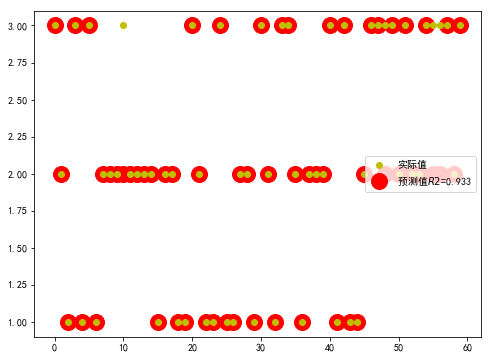

In [73]:
plt.figure(figsize=(8, 6), facecolor='w')
x = np.arange(len(X_test))
plt.plot(x,Y_test,'yo',markersize = 6,zorder=2,label=u'实际值')
plt.plot(x,Y_predict,'ro',markersize = 16,zorder=1,label=u'预测值$R2$=%.3f' % r)
plt.legend(loc = 'right')
plt.show()

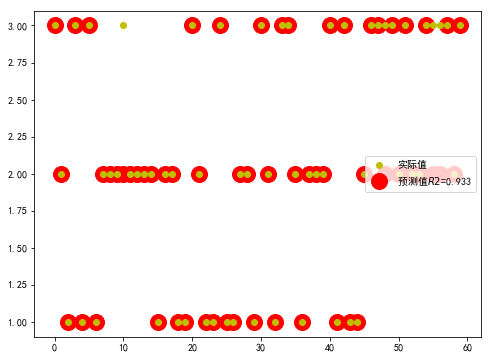

In [74]:
# use LogisticRegressionCV
#创建模型
lrcv= LogisticRegressionCV(Cs = np.logspace(-4,1,50),cv = 5,solver='lbfgs', multi_class='multinomial')
lrcv.fit(X_train,Y_train)
y_predict = lrcv.predict(X_test)
plt.figure(figsize=(8, 6), facecolor='w')
x = np.arange(len(X_test))
plt.plot(x,Y_test,'yo',markersize = 6,zorder=2,label=u'实际值')
plt.plot(x,y_predict,'ro',markersize = 16,zorder=1,label=u'预测值$R2$=%.3f' % lrcv.score(X_test,Y_test))
plt.legend(loc = 'right')
plt.show()